# Sentiment analysis of YouTube comments responding to the EU-Qatar corruption scandal



In this project, I created a function to scrape YouTube comments which integrates the bot_studio Python module. I then used the textblob module to perform sentiment analysis on each comment and created visualizations to display the distribution of sentiment in the data. This allowed me to gain insights into the overall sentiment of the comments on a given YouTube video.

In [1]:
# Import packages

import sys
!{sys.executable} -m pip install youtube-comment-scraper-python
from youtube_comment_scraper_python import *
import pandas as pd
from bot_studio import *

In [2]:
#Create a function which scrapes for youtube url and extracts the comments. 

def get_comments(video_url, fields):
    youtube_bot = bot_studio.youtube()
    youtube_bot.open(video_url)

    all_comments = []

    try:
        while True:
            response = youtube_bot.video_comments(fields=fields)
            for data in response['body']:
                all_comments.append(data)
            youtube_bot.scroll()
            if youtube_bot.is_last_page():
                break
    except Exception as e:
        print(f"An error occurred: {e}")

    return all_comments

comments = get_comments("https://www.youtube.com/watch?v=K45FstLUvuU", ['Comment'])


Progress:  66%|█████████████████████████████████████████████                       | 132.6/200 [03:42<06:36,  5.88s/it]
Progress: 100%|████████████████████████████████████████████████████████████████████| 200.0/200 [03:52<00:00,  1.16s/it]


In [3]:
comments

[{'Comment': 'Why do these MPs never face any jail time?'},
 {'Comment': 'Who would have thought that FIFA, Qatar and Politicians would be involved in corruption.... The FIFA President took the moral high ground and told Europeans to ask for forgiveness for the last 3 000 years.'},
 {'Comment': "Someone didn't receive their part of the take otherwise the police would have never found out..."},
 {'Comment': '"we are absolutely shocked and outrage"Hold on a second.I watched few years ago a documentary on the building close to EU parliament full of lobbiest from corporations. I am more than sure they give out kick backs for the right voting outcome.'},
 {'Comment': 'And they wonder why people are cynical of party politics.'},
 {'Comment': 'I think if you went to any politicians house you would find bags of cash'},
 {'Comment': 'This is the problem with supranatural governments, its bad enough when you have corrupt politicians in your own country but politicians voted in to office in one c

In [4]:
# Convert the dictionary to a DataFrame
df = pd.DataFrame(comments)
df.head()

,Comment
0,Why do these MPs never face any jail time?
1,"Who would have thought that FIFA, Qatar and Po..."
2,Someone didn't receive their part of the take ...
3,"""we are absolutely shocked and outrage""Hold on..."
4,And they wonder why people are cynical of part...


In [6]:
# Perform a sentiment analysis of Youtube comments

import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string

# Initialize the stemmer and stopwords
stemmer = PorterStemmer()
stop_words = set(stopwords.words("english"))

# Function to preprocess the text
def preprocess_text(text):
    
    text = text.lower()
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords and punctuation
    filtered_tokens = [token for token in tokens if token not in stop_words and token not in string.punctuation and not token.isdigit()]
    
    # Join the filtered tokens into a single string
    preprocessed_text = " ".join(filtered_tokens)
    
    return preprocessed_text

# Preprocess the 'text' column of the DataFrame
df['Comment'] = df['Comment'].apply(preprocess_text)

# Display the preprocessed DataFrame
print(df)


                                              Comment
0                            mps never face jail time
1   would thought fifa qatar politicians would inv...
2   someone n't receive part take otherwise police...
3   `` absolutely shocked outrage `` hold second.i...
4                wonder people cynical party politics
5   think went politicians house would find bags cash
6   problem supranatural governments bad enough co...
7         always leave us thinking corruptions ’ know
8                                    feel people like
9        probably fallperson/scapegoat bigger problem
10  would possible add party fraction mp ’ part ne...
11  think easy option would disband eu parliament ...
12        wish would westminster oh wait ’ government
13  european unions mouthpiece james brien awfully...
14         well 's start von de lyan pfizer texts ...
15                       weird competition went ahead
16  ’ greek way remember working ’ importer take b...
17  part reason uk left eu c

In [7]:
# Create a function which extracts the sentiment of each YouTube comment

from textblob import TextBlob

def get_sentiment(text):
    sentiment = TextBlob(text).sentiment.polarity
    if sentiment > 0:
        return "positive"
    elif sentiment < 0:
        return "negative"
    else:
        return "neutral"

df['sentiment'] = df['Comment'].apply(get_sentiment)

df['sentiment']

0     negative
1     positive
2      neutral
3     positive
4     negative
5      neutral
6     negative
7      neutral
8      neutral
9      neutral
10     neutral
11    positive
12     neutral
13     neutral
14     neutral
15    negative
16     neutral
17    positive
18    positive
19    negative
Name: sentiment, dtype: object

In [11]:
# Create a function which extracts the sentiment, polarity and subjectivity scores of each YouTube comment

def get_sentiment(text):
    sentiment = TextBlob(text).sentiment
    polarity = sentiment.polarity
    subjectivity = sentiment.subjectivity
    if polarity > 0:
        return "positive", polarity, subjectivity
    elif polarity < 0:
        return "negative", polarity, subjectivity
    else:
        return "neutral", polarity, subjectivity

df['sentiment'], df['polarity'], df['subjectivity'] = zip(*df['Comment'].apply(get_sentiment))
df.head()

,Comment,sentiment,polarity,subjectivity
0,mps never face jail time,negative,-0.100000,0.000000
1,would thought fifa qatar politicians would inv...,positive,0.053333,0.285556
2,someone n't receive part take otherwise police...,neutral,0.000000,0.000000
3,`` absolutely shocked outrage `` hold second.i...,positive,0.087143,0.554921
4,wonder people cynical party politics,negative,-0.600000,1.000000


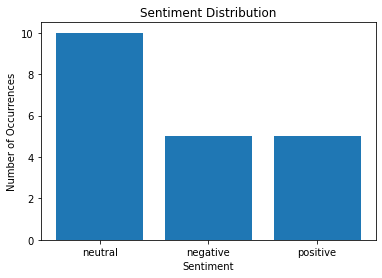

In [12]:
import matplotlib.pyplot as plt

# Count the number of occurrences of each sentiment
sentiment_counts = df['sentiment'].value_counts()

# Plot the results as a bar chart
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Number of Occurrences')
plt.title('Sentiment Distribution')
plt.show()


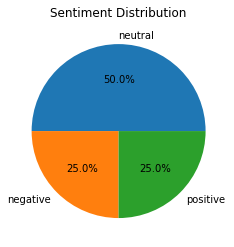

In [13]:
# Count the number of occurrences of each sentiment
sentiment_counts = df['sentiment'].value_counts()

# Plot the results as a pie chart
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()


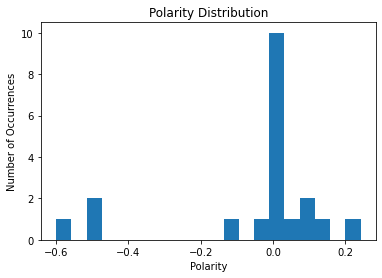

In [14]:
# Plot the distribution of polarity values
plt.hist(df['polarity'], bins=20)
plt.xlabel('Polarity')
plt.ylabel('Number of Occurrences')
plt.title('Polarity Distribution')
plt.show()


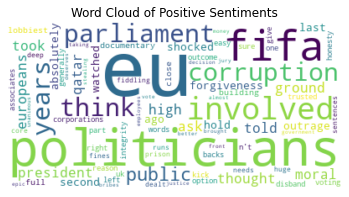

In [16]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Get the text of the positive sentiments
positive_text = ' '.join(df[df['sentiment'] == 'positive']['Comment'])

# Create a word cloud object
wordcloud = WordCloud(background_color='white').generate(positive_text)

# Plot the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Sentiments')
plt.show()


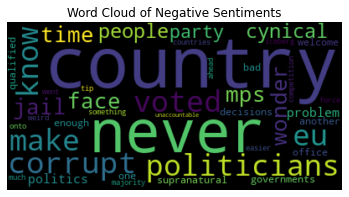

In [18]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Get the text of the positive sentiments
positive_text = ' '.join(df[df['sentiment'] == 'negative']['Comment'])

# Create a word cloud object
wordcloud = WordCloud(background_color='black').generate(positive_text)

# Plot the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Sentiments')
plt.show()


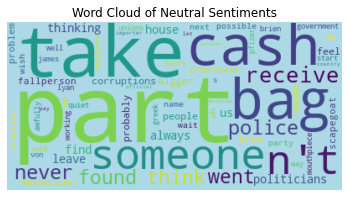

In [21]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Get the text of the positive sentiments
positive_text = ' '.join(df[df['sentiment'] == 'neutral']['Comment'])

# Create a word cloud object
wordcloud = WordCloud(background_color='lightblue').generate(positive_text)

# Plot the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Neutral Sentiments')
plt.show()

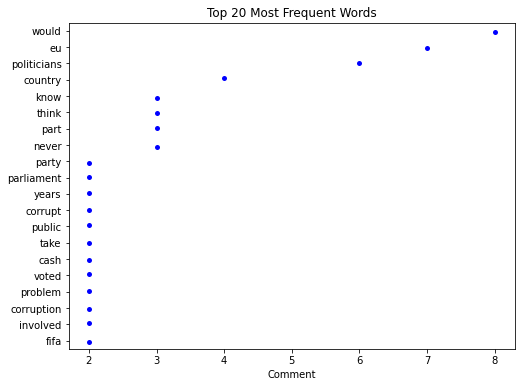

In [27]:
import seaborn as sns

# Create a list of the top 20 most frequent words
top_20_words = df['Comment'].apply(lambda x: [word for word in x.split() if word.isalpha()]).explode().value_counts().nlargest(20)

plt.figure(figsize=(8, 6))

# Plot the dot plot
sns.stripplot(data=df, x=top_20_words, y=top_20_words.index, color='blue', linewidth=0)
plt.title('Top 20 Most Frequent Words')
plt.show()
